In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('F:/ml-data/disaster/train.csv')
test_data = pd.read_csv('F:/ml-data/disaster/test.csv')

###  data pre deal 

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.size

10692

In [5]:
for col in train_data.columns:
    print(col, str(round(100* train_data[col].isnull().sum()/len(train_data), 2)) + '%')

PassengerId 0.0%
Survived 0.0%
Pclass 0.0%
Name 0.0%
Sex 0.0%
Age 19.87%
SibSp 0.0%
Parch 0.0%
Ticket 0.0%
Fare 0.0%
Cabin 77.1%
Embarked 0.22%


In [6]:
train_data['Last_name'] = train_data['Name'].str.split('.', expand=True)[0]  ## 增加字段last name 判断是否一家人
test_data['Last_name'] = test_data['Name'].str.split('.', expand=True)[0]

In [7]:
ds = pd.concat([train_data, test_data]) ## 连接train_data, test_data

In [8]:
sur = []
die = []
for index, row in ds.iterrows():
    s = ds[(ds['Last_name']==row['Last_name']) & (ds['Survived']==1)]
    d = ds[(ds['Last_name']==row['Last_name']) & (ds['Survived']==0)]
    s = len(s)
    if row['Survived'] == 1:
        s -= 1
    d = len(d)
    if row['Survived'] == 0:
        d -= 1
    sur.append(s)
    die.append(d)


In [9]:
ds['FamilySurvied'] = sur
ds['FamilyDied'] = die

In [10]:
ds['FamilySize'] = ds['SibSp'] + ds['Parch'] + 1
ds['IsAlone'] = 0
ds.loc[ds['FamilySize'] == 1, 'IsAlone'] = 1
ds['Fare'] = ds['Fare'].fillna(train_data['Fare'].median())
ds['Embarked'] = ds['Embarked'].fillna('Q')

In [11]:
train_data['rich_woman'] = 0
test_data['rich_woman'] = 0
train_data['men_3'] = 0
test_data['men_3'] = 0

train_data.loc[(train_data['Pclass']<=2) & (train_data['Sex']=='female'), 'rich_woman'] = 1  ## 2等票以上
test_data.loc[(test_data['Pclass']<=2) & (test_data['Sex']=='female'), 'rich_woman'] = 1
train_data.loc[(train_data['Pclass']==3) & (train_data['Sex']=='male'), 'men_3'] = 1         ## 3等票
test_data.loc[(test_data['Pclass']==3) & (test_data['Sex']=='male'), 'men_3'] = 1

In [12]:
train_data['rich_woman'] = train_data['rich_woman'].astype(np.int8)
test_data['rich_woman'] = test_data['rich_woman'].astype(np.int8)

In [13]:
train_data["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train_data['Cabin']])
test_data['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test_data['Cabin']])

In [14]:
train_data = train_data.drop(['PassengerId', 'Ticket', 'Last_name', 'SibSp', 'Parch'], axis=1)
test_data = test_data.drop(['PassengerId', 'Ticket', 'Last_name', 'SibSp', 'Parch'], axis=1)

In [15]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,rich_woman,men_3
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,X,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,X,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,X,S,0,1


In [16]:
test_data.head()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,rich_woman,men_3
0,3,"Kelly, Mr. James",male,34.5,7.8292,X,Q,0,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,X,S,0,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,X,Q,0,0
3,3,"Wirz, Mr. Albert",male,27.0,8.6625,X,S,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,X,S,0,0


In [17]:
categorical = ['Pclass', 'Sex', 'Embarked', 'Cabin']
for cat in categorical:
    train_data = pd.concat([train_data, pd.get_dummies(train_data[cat], prefix=cat)], axis=1)  
    train_data = train_data.drop([cat], axis=1)
    test_data = pd.concat([test_data, pd.get_dummies(test_data[cat], prefix=cat)], axis=1)
    test_data = test_data.drop([cat], axis=1)
    
train_data = train_data.drop(['Sex_male', 'Name'], axis=1)
test_data =  test_data.drop(['Sex_male', 'Name'], axis=1)

train_data = train_data.fillna(-1)
test_data = test_data.fillna(-1)

In [18]:
train_data.head()

,Survived,Age,Fare,rich_woman,men_3,Pclass_1,Pclass_2,Pclass_3,Sex_female,Embarked_C,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
0,0,22.0,7.2500,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,1,26.0,7.9250,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,0,35.0,8.0500,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [28]:
test_data.head()

,Age,Fare,rich_woman,men_3,Pclass_1,Pclass_2,Pclass_3,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X
0,34.5,7.8292,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,47.0,7.0000,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,62.0,9.6875,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,27.0,8.6625,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,22.0,12.2875,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1


In [29]:
import matplotlib.pyplot as plt
import plotly.express as px

### 数据展示

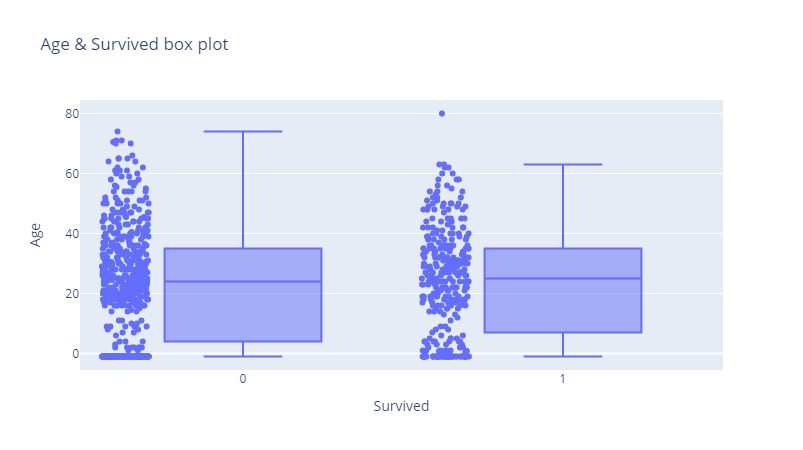

In [41]:
fig = px.box(train_data, x = 'Survived', y = 'Age', points='all', height=450, width=650, title='Age & Survived box plot')
fig.show()

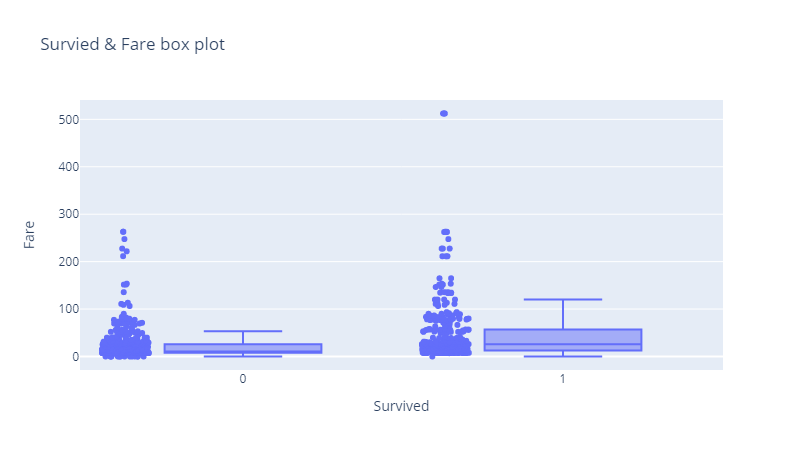

In [40]:
fig = px.box(train_data, x = 'Survived', y = 'Fare', points='all', height=450, width=650, title = 'Survied & Fare box plot')
fig.show()

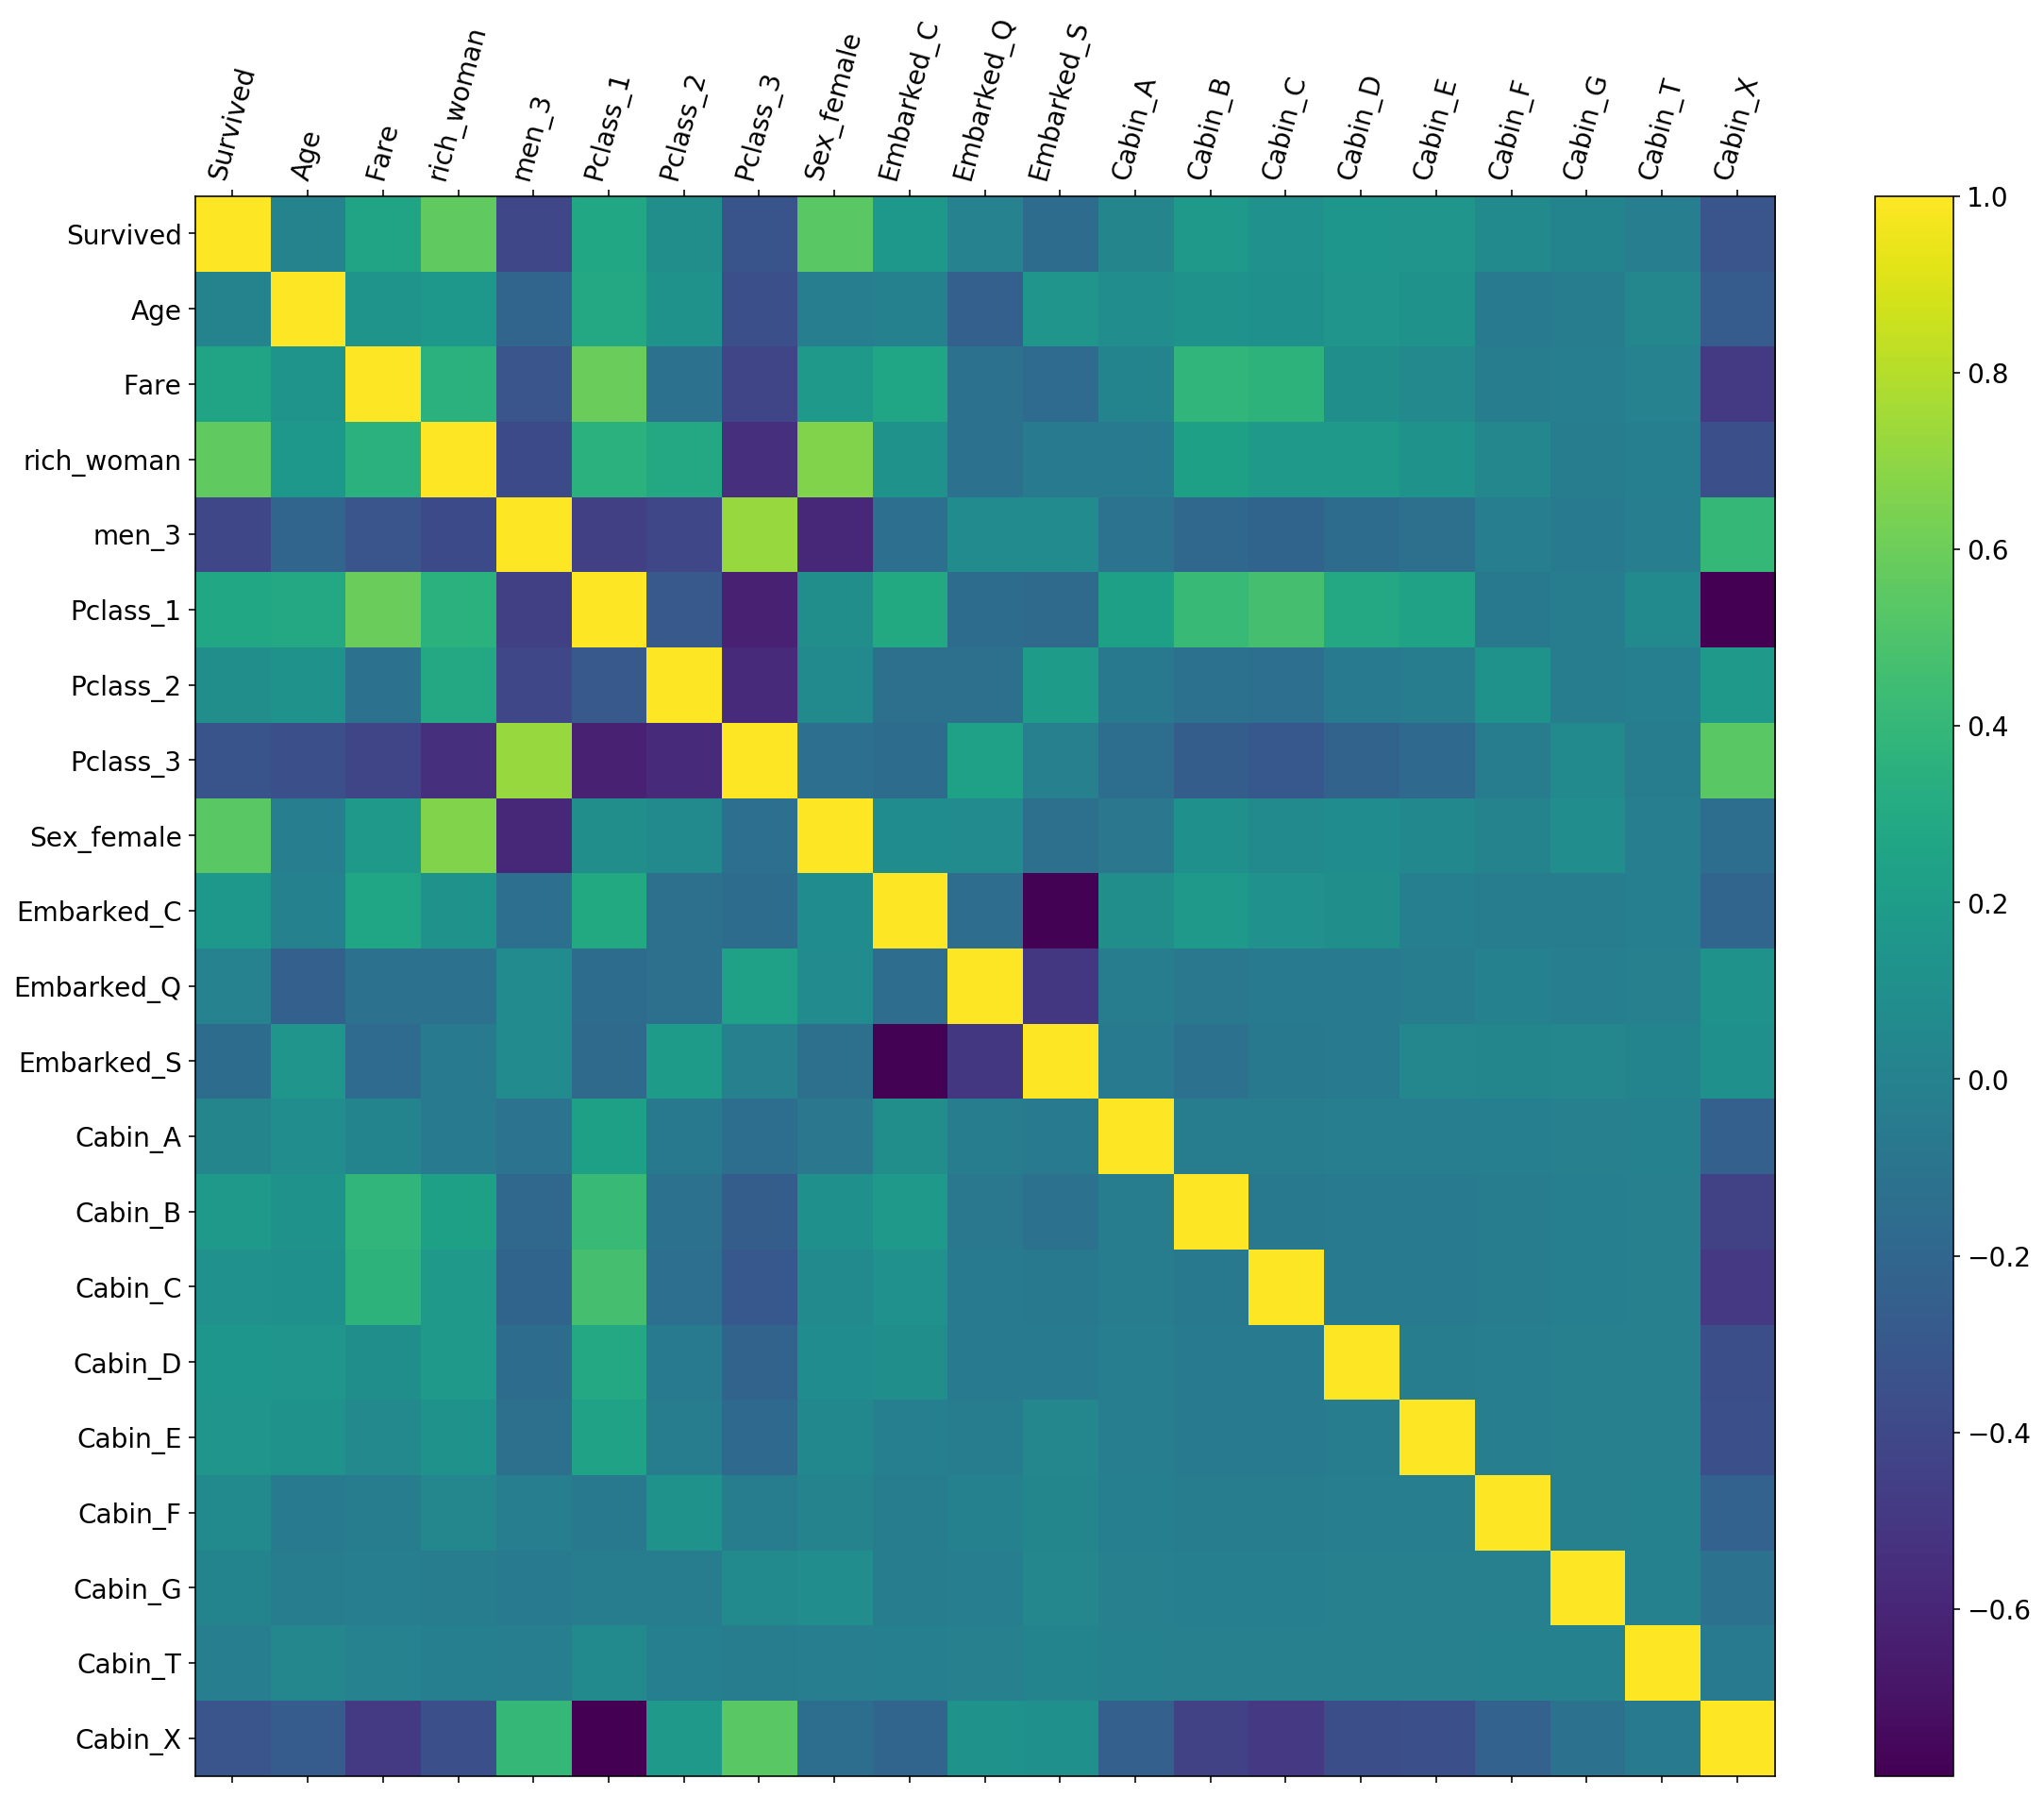

In [45]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train_data.corr(), fignum=f.number)   ### 展示相关系数
plt.xticks(range(train_data.shape[1]), train_data.columns, fontsize=14, rotation=75)
plt.yticks(range(train_data.shape[1]), train_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)